# **Students Performance in Examinations**

### GOAL : 
This project aims to understand how student performance (test scores) is influenced by various factors, including Gender, Ethnicity, Parental Level of Education, Lunch, and Test Preparation Course.

### Attribute Information:
- The dataset comprises 1000 entries and 8 columns (features).
- 
Each row represents student informationt
- The columns represent different characteristics or features that can be extracted frostudents informationtent (e.g., whether Gender, Ethnicity, Parental Level of Education, Lunch and Test Preparation Course).
- **Gender:** Gender of students(Male/Female)
- **Race/Ethnicity:** Ethnicity of students (Group A, B, C, D, E)
- **Parental Level of Education:** Parents' final education(Bachelor's degree, Some college, Master's degree, Associate's degree, High school)
- **Lunch:** Having lunch before test (Standard or Free/Reduced)
- **Test Preparation Course:** Complete or not completed before test
- **Math Score Calculator**
- **Reading Score**
- **Writing Score.**
Writin. Score  data openml

## **Import Libraries**

In [586]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot, plot
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

**Importing necessary libraries**

* pandas and numpy: for data manipulation and numerical operations.
* matplotlib and seaborn: for visualizations.
* StandardScaler: for standardizing feature values.

## **Importing DataFile**

In [269]:
students=pd.read_csv('StudentsPerformance.csv')
students

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### Check First 5 Records

In [23]:
students.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Check Last 5 Records

In [25]:
students.tail(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


### Check Number of Rows and fields

In [42]:
students.shape

(1000, 8)

### **Observation :** 1000 Rows and 8 Columns(Fields)

#  **Exploratory Data Analysis (EDA):**

In [44]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# **Checking Missing Values**

In [48]:
students.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### **Observation :** No Missing values in the dataset

# **Check NULL values and data types**

In [50]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# **Check Unique values**

In [57]:
students.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

 * **Data Inspection:** The code explores the dataset's structure (e.g., `data.info()`) and unique values within each column.

* The dataset has 1000 entries and 8 columns.

# **Check statistics of dataset**

In [60]:
students.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### **Insight:** 
* From above description of numerical data, all means are very close to each other - between 66 and 68.05; 
* All standard deviations are also close - between 14.6 and 15.19; 
* While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

# **Check categories in the each field**

In [72]:
print("Categories in 'gender' variable: ",end=" " )
print(students['gender'].unique())

print("Categories in 'race_ethnicity' variable: ",end=" ")
print(students['race_ethnicity'].unique())

print("Categories in'parental_level_of_education' variable: ",end=" " )
print(students['parental_level_of_education'].unique())

print("Categories in 'lunch' variable: ",end=" " )
print(students['lunch'].unique())

print("Categories in 'test preparation course' variable: ",end=" " )
print(students['test_preparation_course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental_level_of_education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


# **Define Numerical & Categorical Fields**

In [79]:
numeric_features = [feature for feature in students.columns if students[feature].dtype != 'O']
categorical_features = [feature for feature in students.columns if students[feature].dtype == 'O']


print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


# **Exploring First 2 Fields for checking Numerical & Categorical Fields**

In [86]:
students.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


# **Adding columns for "Total Score" and "Average"**

In [310]:
students['total score'] = students['math_score'] + students['reading_score'] + students['writing_score']
students['average'] = students['total score']/3
students.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


# **Total Number of students score full marks i.e 100**

In [312]:
reading_full = students[students['reading_score'] == 100]['average'].count()
writing_full = students[students['writing_score'] == 100]['average'].count()
math_full = students[students['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


# **Total Number of students score full marks in all subjects**

In [445]:
perfect_writing = students['writing_score'] == 100
perfect_reading = students['reading_score'] == 100
perfect_math = students['math_score'] == 100

perfect_score = students[(perfect_math) & (perfect_reading) & (perfect_writing)]
print('Number of students having maximum marks in all three subjects:',len(perfect_score))

Number of students having maximum marks in all three subjects: 3


# **Total Number of students score less than 20 Marks**

In [316]:
reading_less_20 = students[students['reading_score'] <= 20]['average'].count()
writing_less_20 = students[students['writing_score'] <= 20]['average'].count()
math_less_20 = students[students['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


# **Total Number of students score less than 20 Marks**

In [467]:
reading_less_20 = students['reading_score'] <= 20
writing_less_20 = students['writing_score'] <= 20
math_less_20 = students['math_score'] <= 20
total_students_less_20=students[(reading_less_20) & (writing_less_20) & (math_less_20)]
print(f'Number of students with less thsn 20 marks in all three subjects :',len(total_students_less_20))

Number of students with less thsn 20 marks in all three subjects : 1


# **Least Score Student in All Subjects**

In [489]:
students[(students['math_score'] <= 20) & (students['reading_score'] <= 20) & (students['writing_score'] <= 20)]\
.sort_values(by=['total_score'],ascending=False)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average,total_score
59,female,group C,some high school,free/reduced,none,0,17,10,27,9.0,27


# **Toppers in All Subjects**

In [487]:
students[(students['math_score'] == 100) & (students['reading_score'] == 100) & (students['writing_score'] == 100)]\
.sort_values(by=['total_score'],ascending=False)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average,total_score
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.0,300
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,100.0,300
962,female,group E,associate's degree,standard,none,100,100,100,300,100.0,300


# **Exploring Data ( Visualization ):**
# Visualize average score distribution to make some conclusion. Histogram Kernel Distribution Function (KDE)

In [295]:
avg_scores = students.groupby('gender').mean(numeric_only=True)
avg_scores

,math_score,reading_score,writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


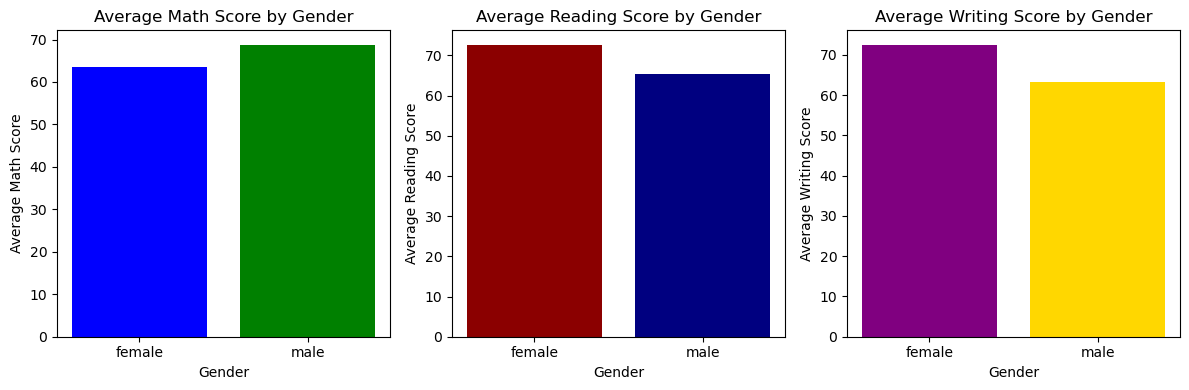

In [289]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Bar plot for Math Score
colors = ['blue', 'green']
axes[0].bar(avg_scores.index, avg_scores['math_score'],color=colors)
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Average Math Score')
axes[0].set_title('Average Math Score by Gender')

# Bar plot for Reading Score
my_color=["darkred","navy"]
axes[1].bar(avg_scores.index, avg_scores['reading_score'],color=my_color)
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Average Reading Score')
axes[1].set_title('Average Reading Score by Gender')

# Bar plot for Writing Score
color_new=["purple","gold"]
axes[2].bar(avg_scores.index, avg_scores['writing_score'],color=color_new)
axes[2].set_xlabel('Gender')
axes[2].set_ylabel('Average Writing Score')
axes[2].set_title('Average Writing Score by Gender')
plt.tight_layout()
plt.show()

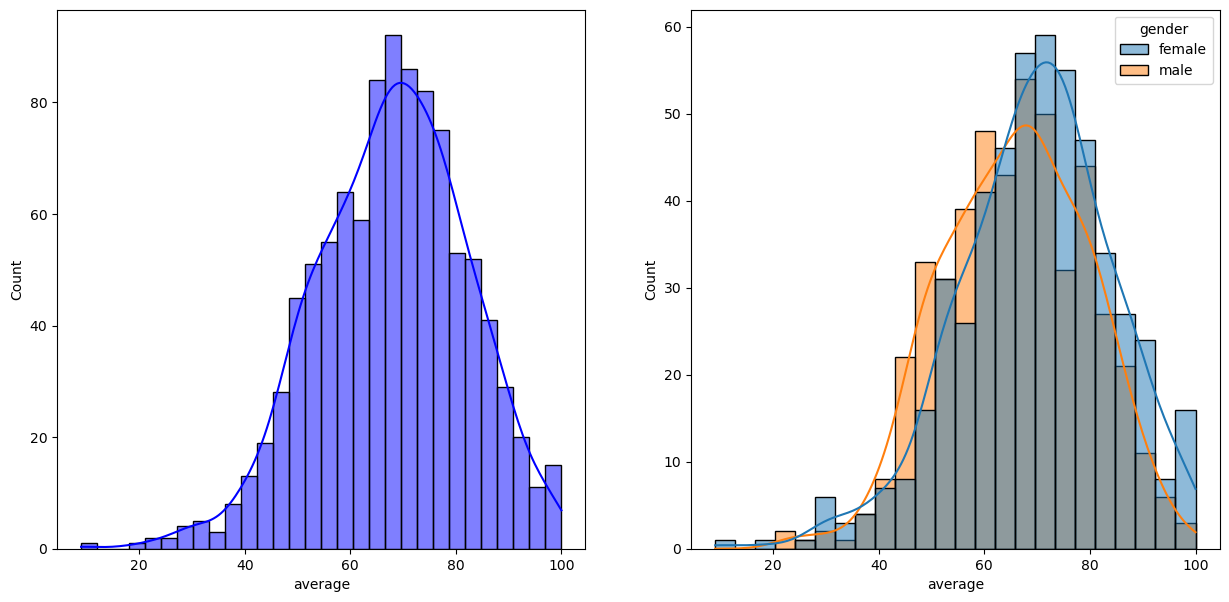

In [318]:
#Histogram & KDE
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=students,x='average',bins=30,kde=True,color='b')
plt.subplot(122)
sns.histplot(data=students,x='average',kde=True,hue='gender')
plt.show()

## Insights : Female students to perform well then male students.

* For females, the average math score is approximately 63.63, the average reading score is around 72.60, and the average writing score is approximately 72.46.

* On the other hand, for males, the average math score is about 68.728, the average reading score is around 65.47, and the average writing score is approximately 63.31.

* These scores provide insights into the performance of students in different subjects based on their gender. It is important to note that these values are averages, indicating the general trend rather than individual performances.

* From the data, we can observe that, on average, males tend to score higher in math compared to females. Conversely, females tend to have higher average scores in both reading and writing compared to males. However, it's essential to remember that these are just average values and individual variations can exist within each gender.

* Further analysis and exploration can be done to determine any potential factors contributing to these score differences, such as teaching methodologies, societal expectations, or individual aptitudes and interests. It is important to approach such analyses with caution and avoid making broad generalizations or assumptions based solely on these scores.

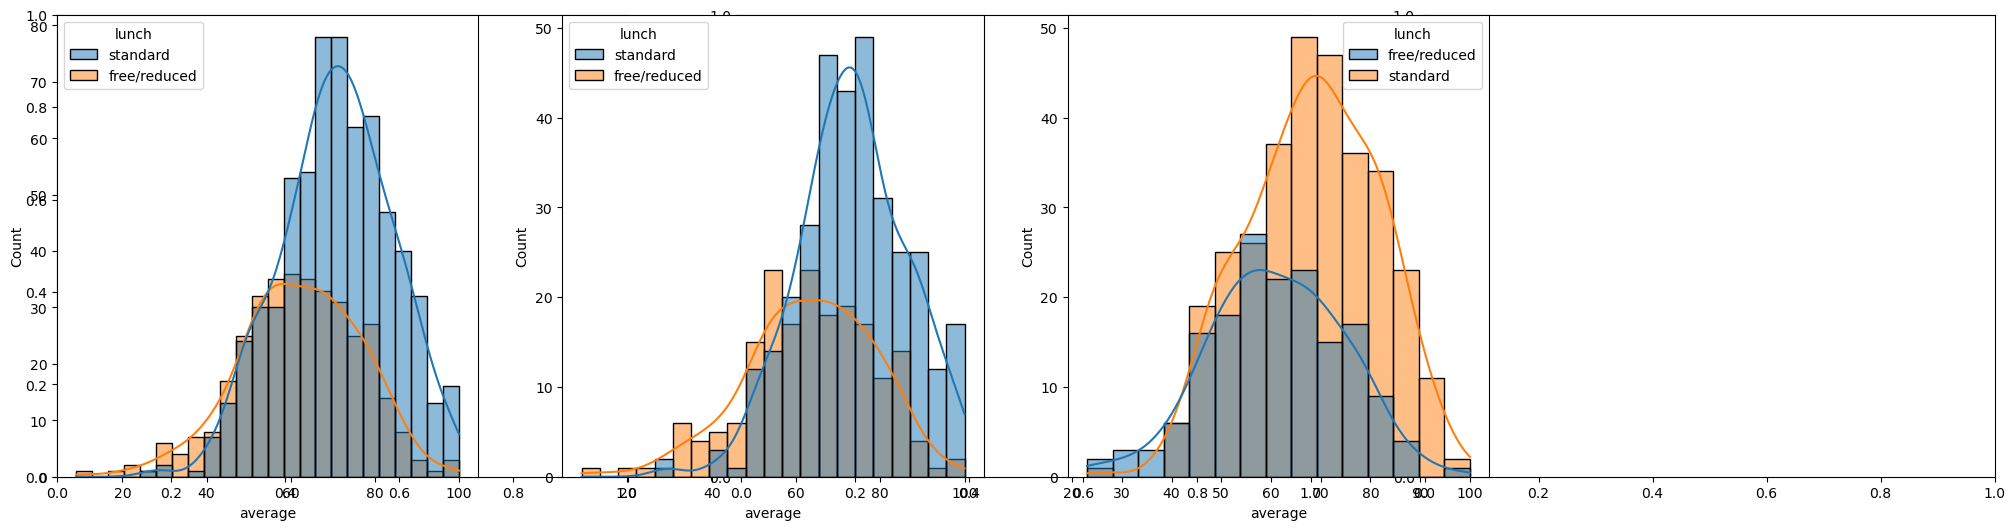

In [320]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=students,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=students[students.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=students[students.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

## Insights: Standard lunch helps perform well in exams be it a male or a female.

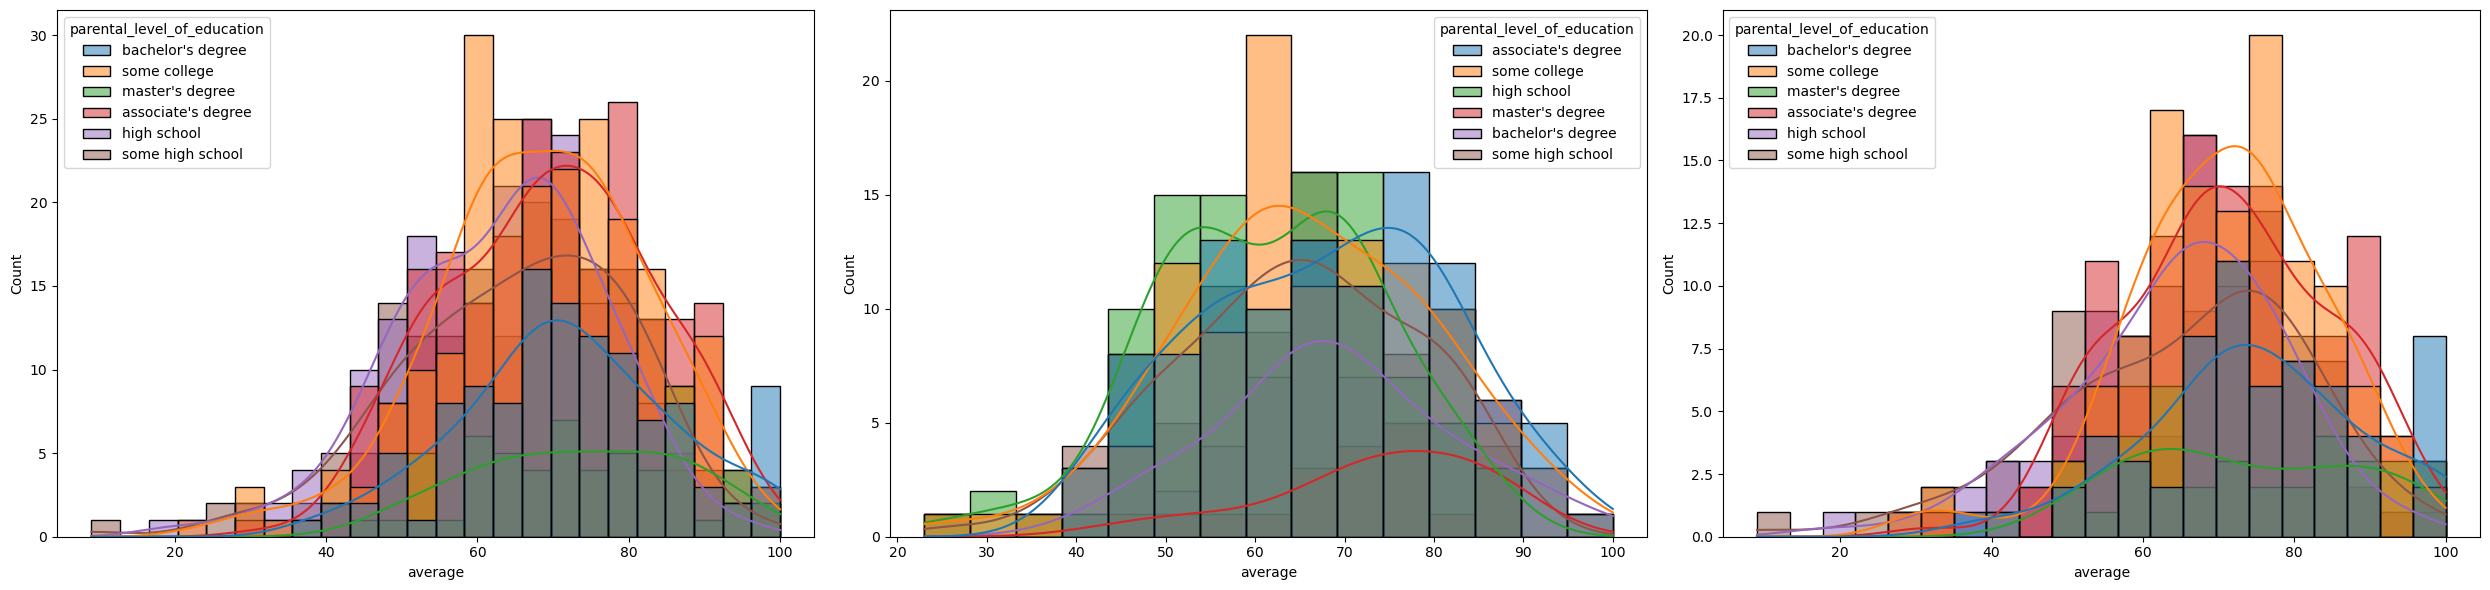

In [117]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax=sns.histplot(data=students,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(132)
ax =sns.histplot(data=students[students.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(133)
ax =sns.histplot(data=students[students.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.tight_layout()
plt.show()

#### Insights: In general parent's education don't help student perform well in exam. 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam 3rd plot we can see there is no effect of parent's education on female students.

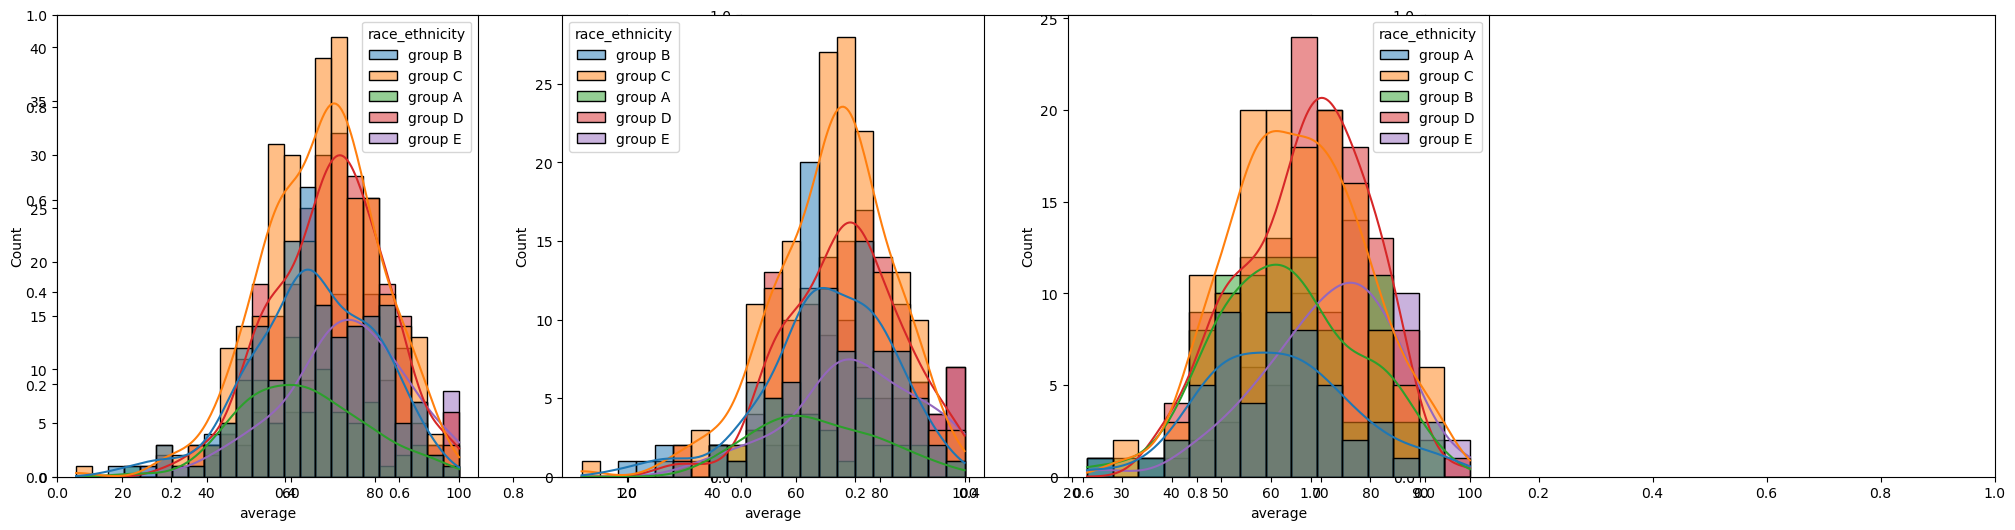

In [322]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=students,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=students[students.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=students[students.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

#### Insights: Students of group A and group B tends to perform poorly in exam. Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

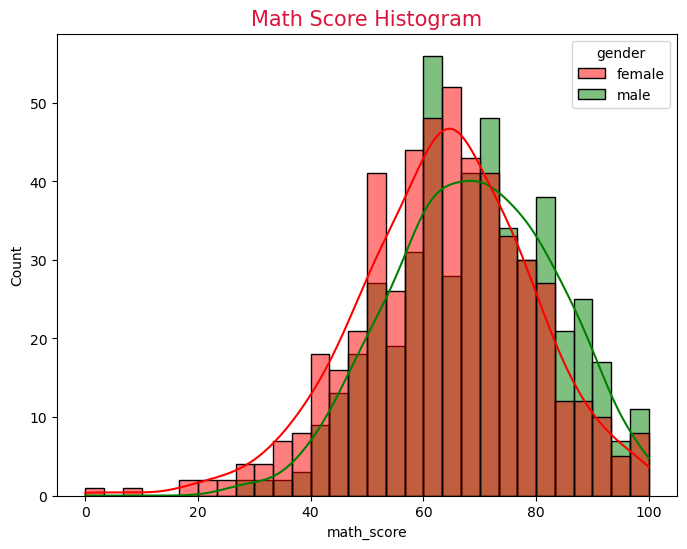

In [352]:
plt.figure(figsize=(8, 6))
sns.histplot(data=students, x="math_score", bins=30,palette=["red","green"],kde=True,hue="gender")
plt.title("Math Score Histogram",fontsize=15,color="crimson")
plt.show()

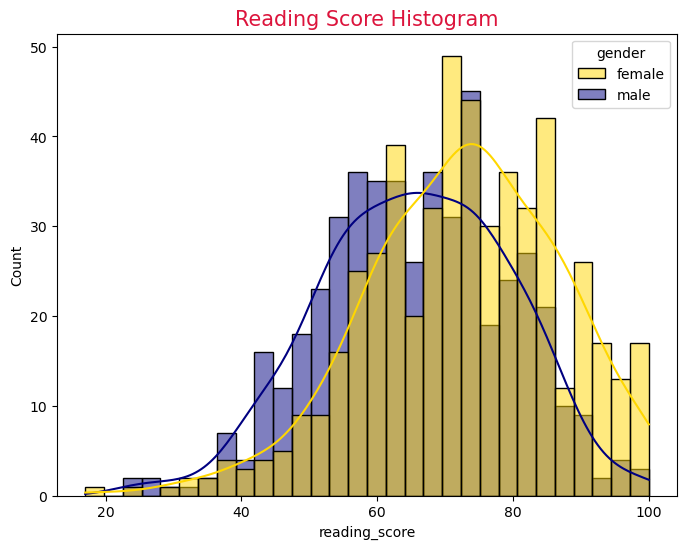

In [354]:
plt.figure(figsize=(8, 6))
sns.histplot(data=students, x="reading_score", bins=30,palette=["gold","navy"],kde=True,hue="gender")
plt.title("Reading Score Histogram",fontsize=15,color="crimson")
plt.show()

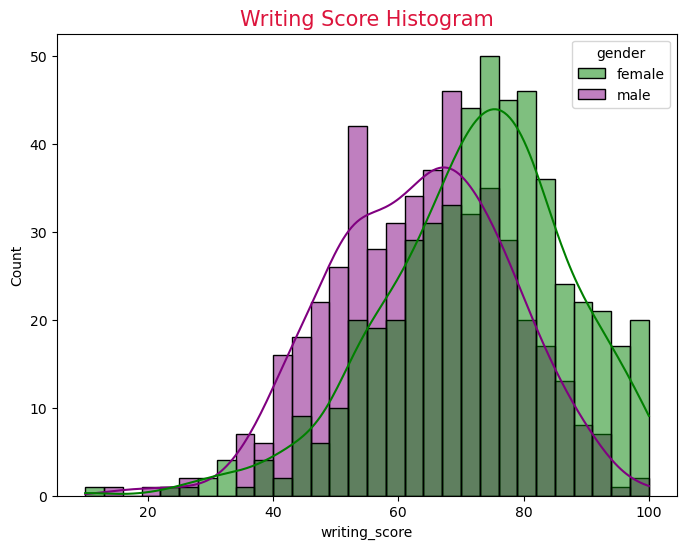

In [356]:
plt.figure(figsize=(8, 6))
sns.histplot(data=students, x="writing_score", bins=30,palette=["green","purple"],kde=True,hue="gender")
plt.title("Writing Score Histogram",fontsize=15,color="crimson")
plt.show()

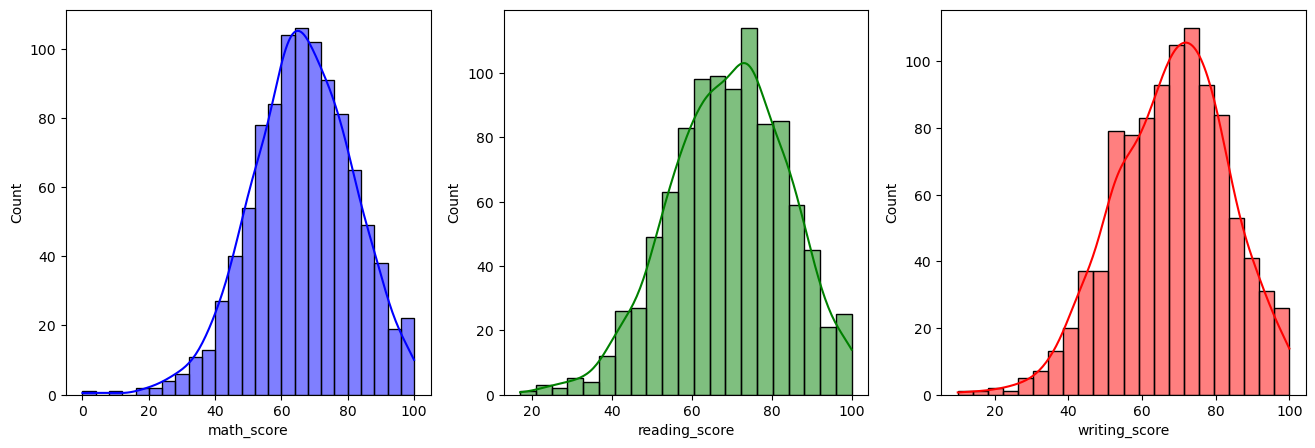

In [358]:
plt.figure(figsize = (16,5))


plt.subplot(1, 3, 1)
sns.histplot(data=students,x='math_score',color="b",kde=True)

plt.subplot(1, 3, 2)
sns.histplot(data=students,x='reading_score',color="g",kde=True)

plt.subplot(1, 3, 3)
sns.histplot(data=students,x='writing_score',color="r",kde=True)

plt.show()

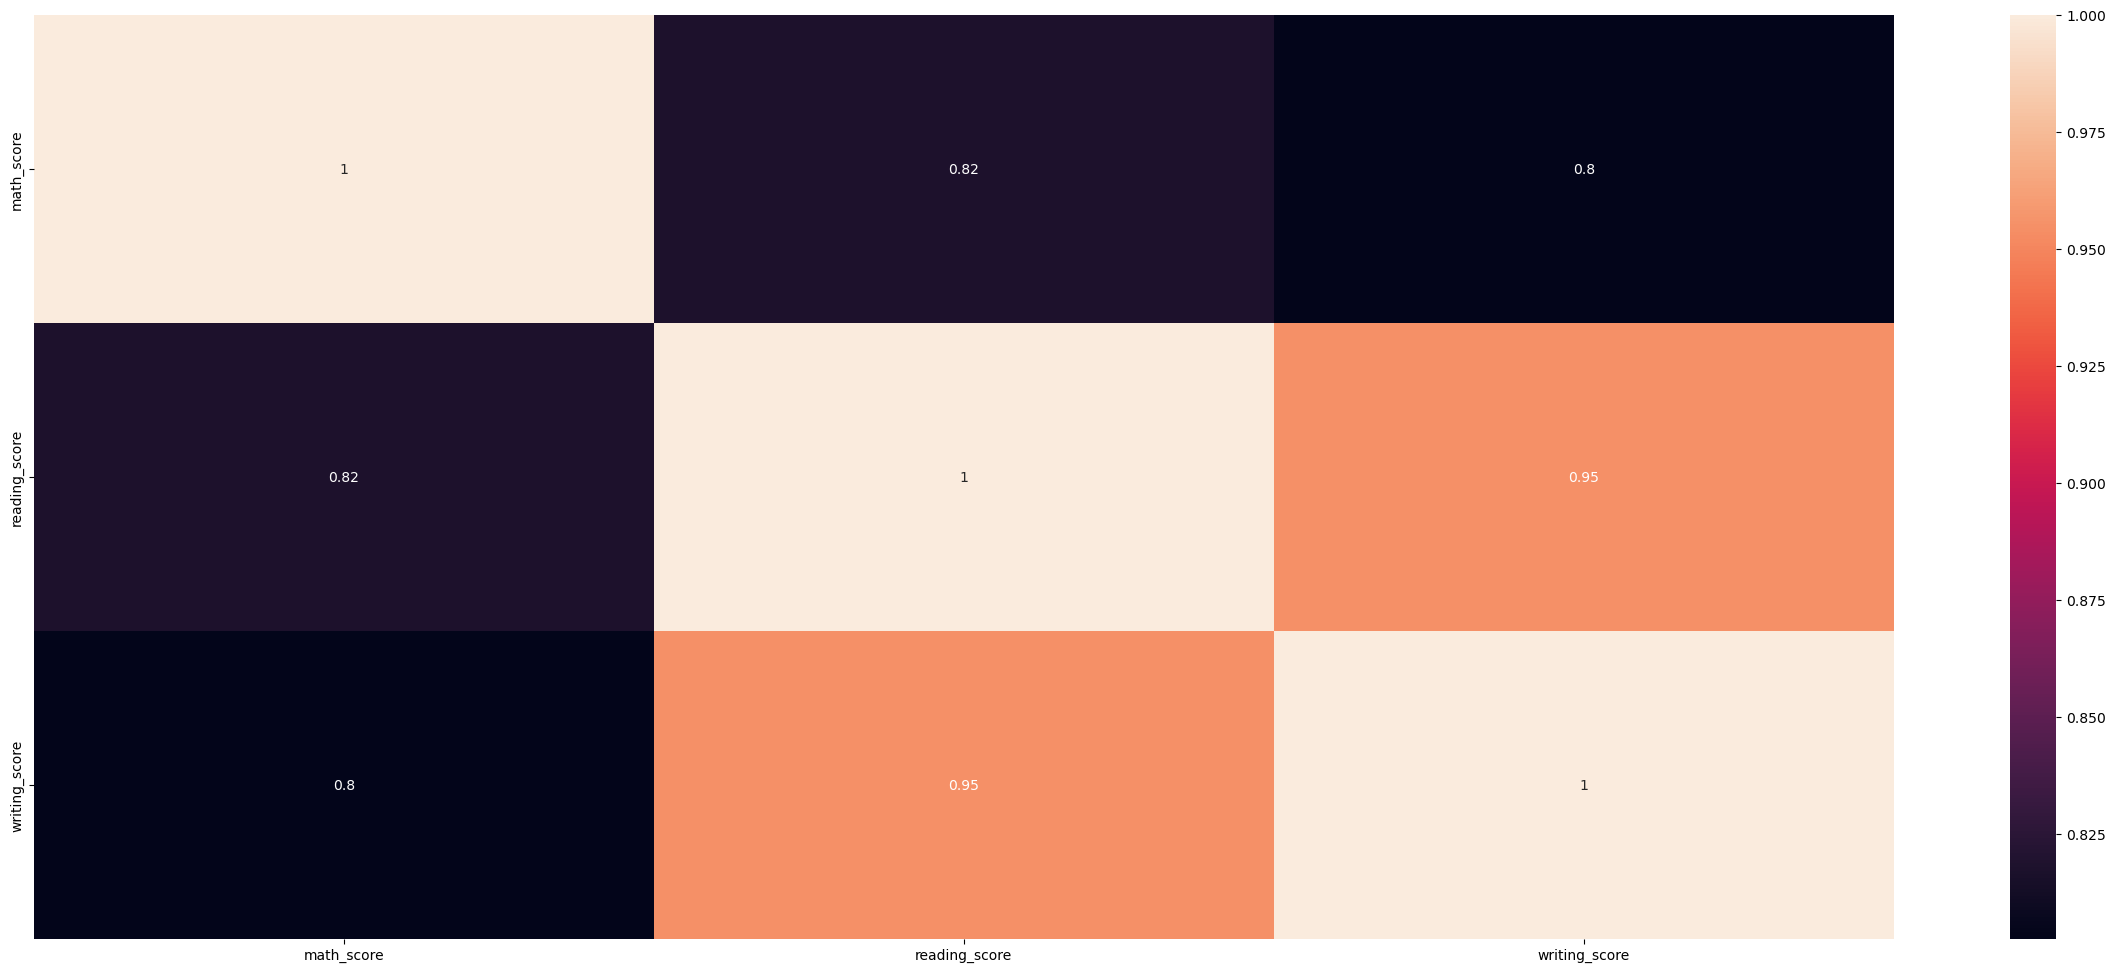

In [360]:
cm=students[['math_score','reading_score','writing_score']].corr()
sns.heatmap(cm, annot=True)
plt.show()

# *Calculate Mean*

In [373]:
math_mean=students["math_score"].mean()
read_mean=students["reading_score"].mean()
write_mean=students["writing_score"].mean()
print(" Math Mean Score :",math_mean)
print(" Reading Mean Score :",read_mean)
print(" Writing Mean Score :",write_mean)

 Math Mean Score : 66.089
 Reading Mean Score : 69.169
 Writing Mean Score : 68.054


In [375]:
mean_scores = {'Math_Score': math_mean, 'Reading_Score': read_mean, 'Writing_Score': write_mean}
students_mean_scores = pd.DataFrame.from_dict(mean_scores, orient='index', columns=['Mean_Score'])
students_mean_scores = students_mean_scores.reset_index()
students_mean_scores

,index,Mean_Score
0,Math_Score,66.089
1,Reading_Score,69.169
2,Writing_Score,68.054


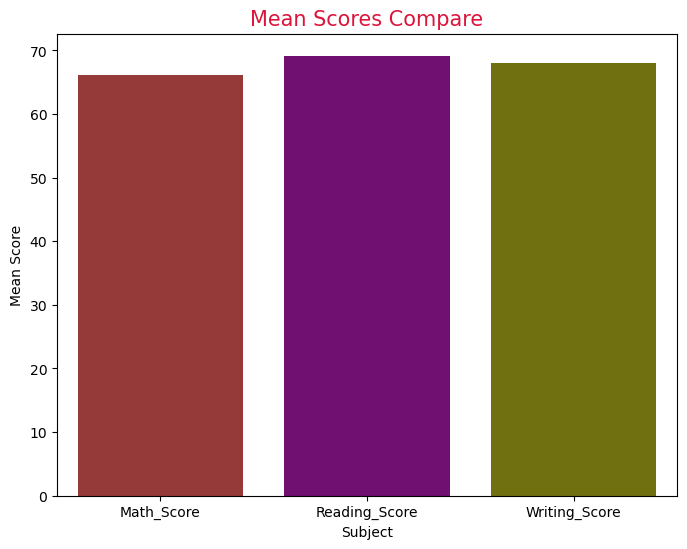

In [377]:
plt.figure(figsize=(8,6))
sns.barplot(x='index', y='Mean_Score', data=students_mean_scores,palette=["brown","purple","olive"])
plt.title('Mean Scores Compare',fontsize=15,color="crimson")
plt.xlabel('Subject')
plt.ylabel('Mean Score')
plt.show()

# *Calculate Median Score*

In [379]:
math_median=students["math_score"].median()
read_median=students["reading_score"].median()
write_median=students["writing_score"].median()
print(" Math Median Score :",math_median)
print(" Reading Median Score :",read_median)
print(" Writing Median Score :",write_median)

 Math Median Score : 66.0
 Reading Median Score : 70.0
 Writing Median Score : 69.0


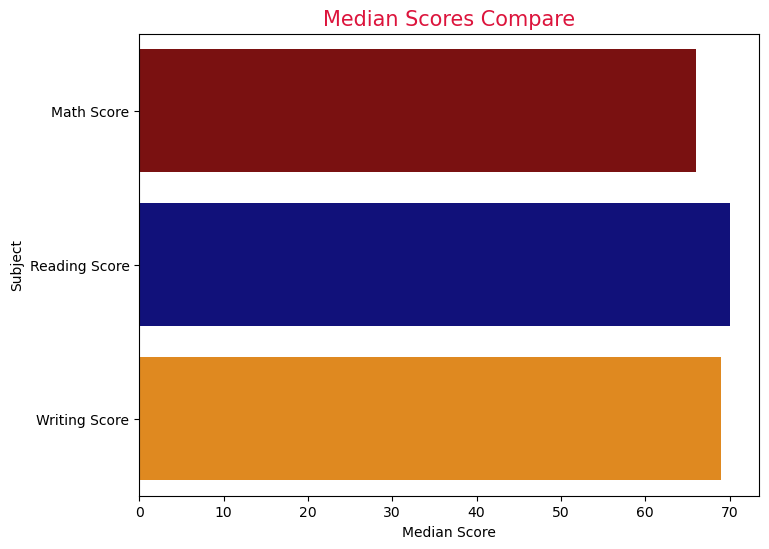

In [381]:
median_score = {'Math Score': math_median, 'Reading Score': read_median, 'Writing Score': write_median}
students_median = pd.DataFrame.from_dict(median_score, orient='index', columns=['Median_Score'])
students_median_score = students_median.reset_index()
plt.figure(figsize=(8,6))
sns.barplot(y='index', x='Median_Score', data=students_median_score,palette=["darkred","darkblue","darkorange"])
plt.title('Median Scores Compare',fontsize=15,color="crimson")
plt.ylabel('Subject')
plt.xlabel('Median Score')
plt.show()

# *Calculate Mode Value*

In [383]:
math_mode=students["math_score"].mode().values[0]
read_mode=students["reading_score"].mode().values[0]
write_mode=students["writing_score"].mode().values[0]
print("Math Mode Score :",math_mode)
print("Reading Mode Score :",read_mode)
print("Writing Mode Score :",write_mode)

Math Mode Score : 65
Reading Mode Score : 72
Writing Mode Score : 74


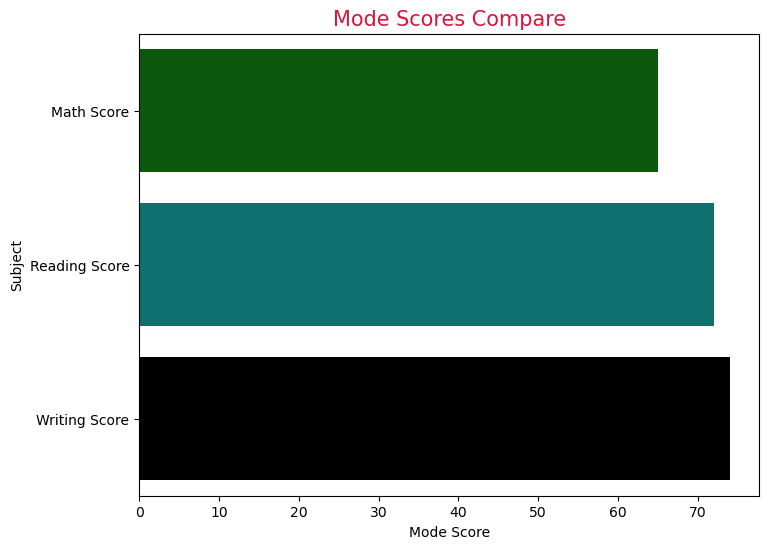

In [385]:
mode_score = {'Math Score': math_mode, 'Reading Score': read_mode, 'Writing Score': write_mode}
students_mode = pd.DataFrame.from_dict(mode_score, orient='index', columns=['Mode_Score'])
students_mode_score = students_mode.reset_index()
plt.figure(figsize=(8,6))
sns.barplot(y='index', x='Mode_Score', data=students_mode_score,palette=["darkgreen","teal","black"])
plt.title('Mode Scores Compare',fontsize=15,color="crimson")
plt.ylabel('Subject')
plt.xlabel('Mode Score')
plt.show()

# *Calculate the standard deviation for math, reading, and writing scores.*

In [387]:
math_std=students["math_score"].std()
read_std=students["reading_score"].std()
write_std=students["writing_score"].std()
print("Math Std Score :",math_std)
print("Reading Std Score :",read_std)
print("Writing Std Score :",write_std)

Math Std Score : 15.163080096009468
Reading Std Score : 14.60019193725222
Writing Std Score : 15.195657010869642


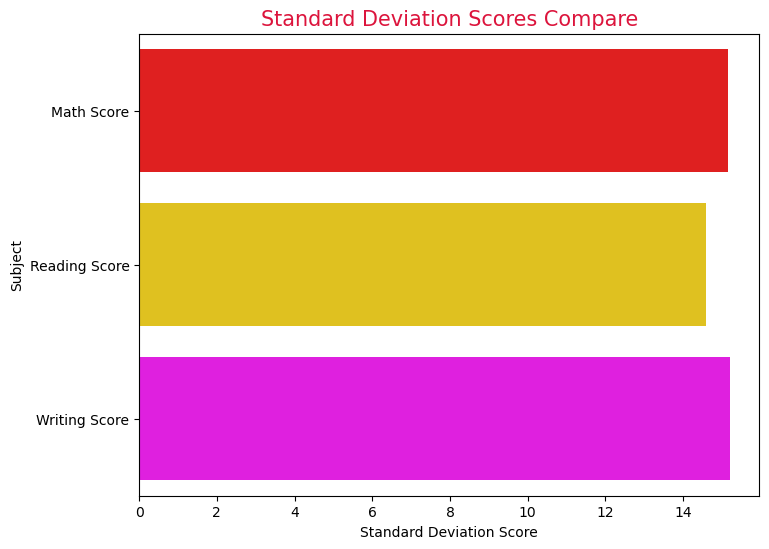

In [389]:
std_score = {'Math Score': math_std, 'Reading Score': read_std, 'Writing Score': write_std}
students_std = pd.DataFrame.from_dict(std_score, orient='index', columns=['Std_Score'])
students_std_score = students_std.reset_index()
plt.figure(figsize=(8,6))
sns.barplot(y='index', x='Std_Score', data=students_std_score,palette=["red","gold","magenta"])
plt.title('Standard Deviation Scores Compare',fontsize=15,color="crimson")
plt.ylabel('Subject')
plt.xlabel('Standard Deviation Score')
plt.show()

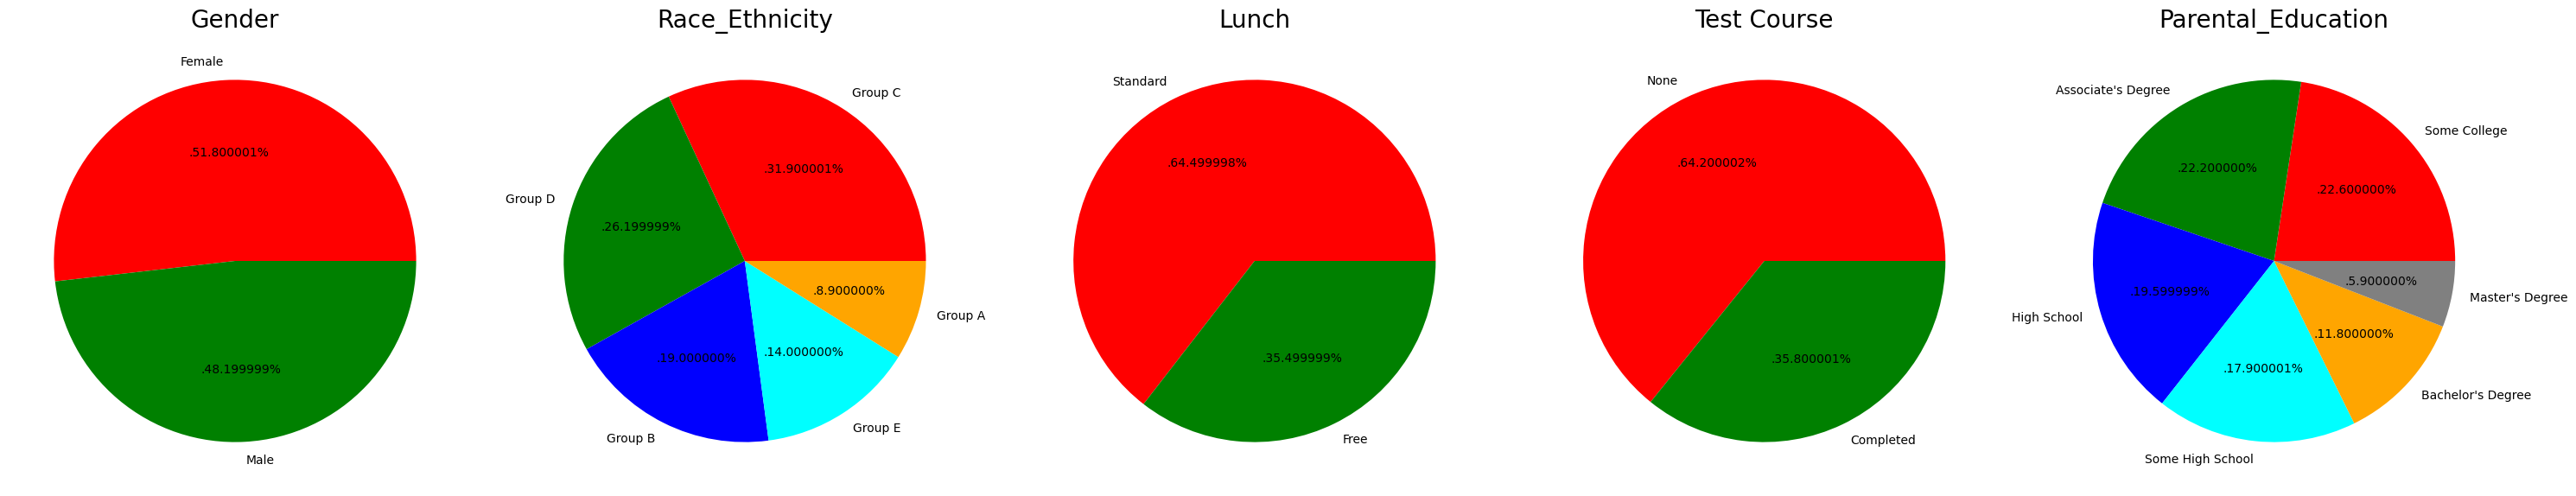

In [298]:
#Multivariate analysis using pieplot
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = students['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = students['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = students['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = students['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = students['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental_Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

### **Insights :** 
**Number of Male and Female students is almost equal Number students are greatest in Group C Number of students who have standard lunch are greater Number of students who have not enrolled in any test preparation course is greater Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"**

#### Feature Wise Visualization GENDER COLUMN How is distribution of Gender ?
#### Is gender has any impact on student's performance ?

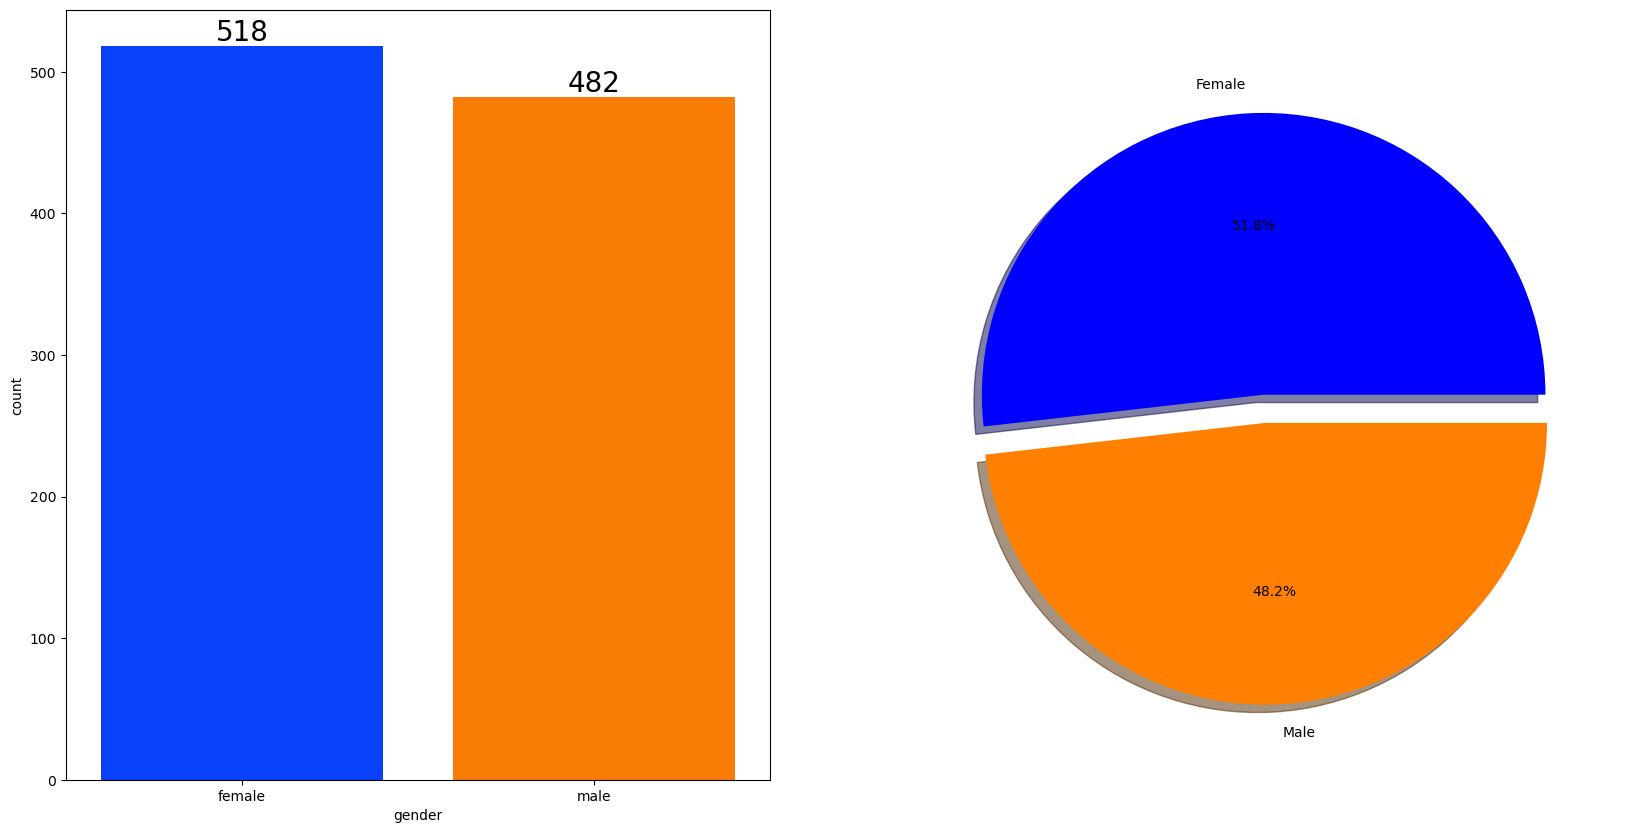

In [184]:
#UNIVARIATE ANALYSIS ( How is distribution of Gender ? )
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=students['gender'],data=students,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=students['gender'].value_counts(),labels=['Female','Male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#0000FF','#ff8000'])
plt.show()

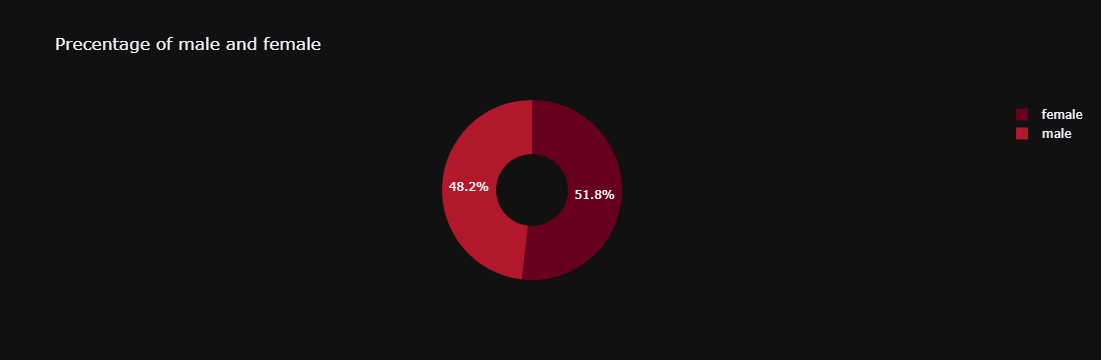

In [428]:
fig = px.pie(students,
            names=students['gender'] ,
            template='plotly_dark',
            color_discrete_sequence=px.colors.sequential.RdBu,
            color='gender',
            hole=0.4,
            title='Precentage of male and female ')
iplot(fig)

#### Insights: Gender has balanced data with female students are 518 (52%) and male students are 482 (48%)

In [140]:
#BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )
gender_group = students.groupby('gender')['average'].mean()
gender_group

gender
female    69.569498
male      65.837483
Name: average, dtype: float64

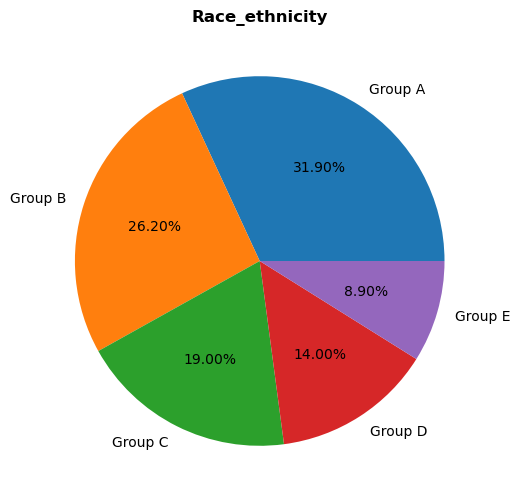

In [144]:
plt.figure(figsize=(10,6))
plt.pie(students['race_ethnicity'].value_counts(), labels=['Group A', 'Group B', 'Group C', 'Group D', 'Group E'], autopct='%1.2f%%')
plt.title('Race_ethnicity', fontweight='bold')
plt.show()

### Parental Level Of Education

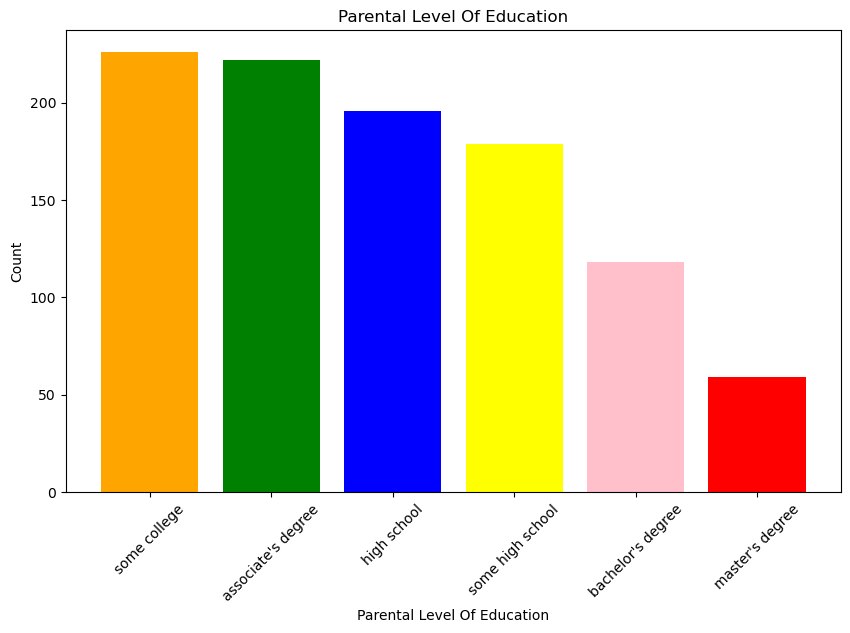

In [146]:
plt.figure(figsize=(10,6))
plt.bar(students['parental_level_of_education'].value_counts().index, students['parental_level_of_education'].value_counts().values,
        color=["orange","green","blue","yellow","pink","red"])

plt.title('Parental Level Of Education')
plt.xlabel('Parental Level Of Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

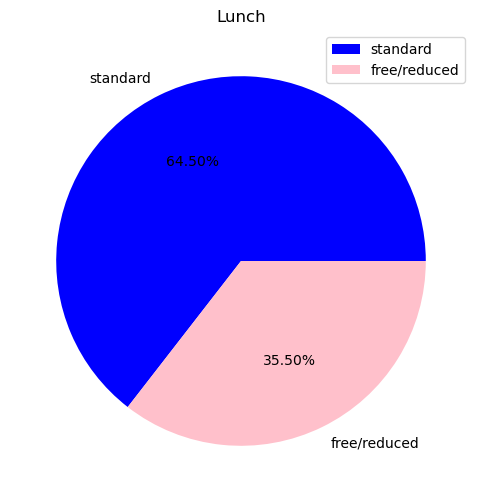

In [148]:
plt.figure(figsize=(10,6))

plt.pie(students['lunch'].value_counts(),colors=['blue','pink'],labels=['standard', 'free/reduced'],autopct='%1.2f%%')
plt.title('Lunch')
plt.legend()
plt.show()

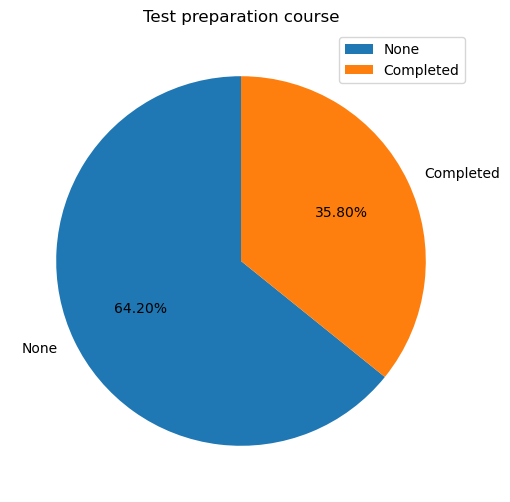

In [152]:
plt.figure(figsize=(10,6))
plt.pie(students['test_preparation_course'].value_counts() ,labels=['None','Completed'], autopct='%1.2f%%', startangle=90)
plt.title('Test preparation course')
plt.legend()
plt.show()

In [431]:
students['total_score'] = students['math_score'] + students['reading_score'] + students['writing_score']
students['total_score']

0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Name: total_score, Length: 1000, dtype: int64

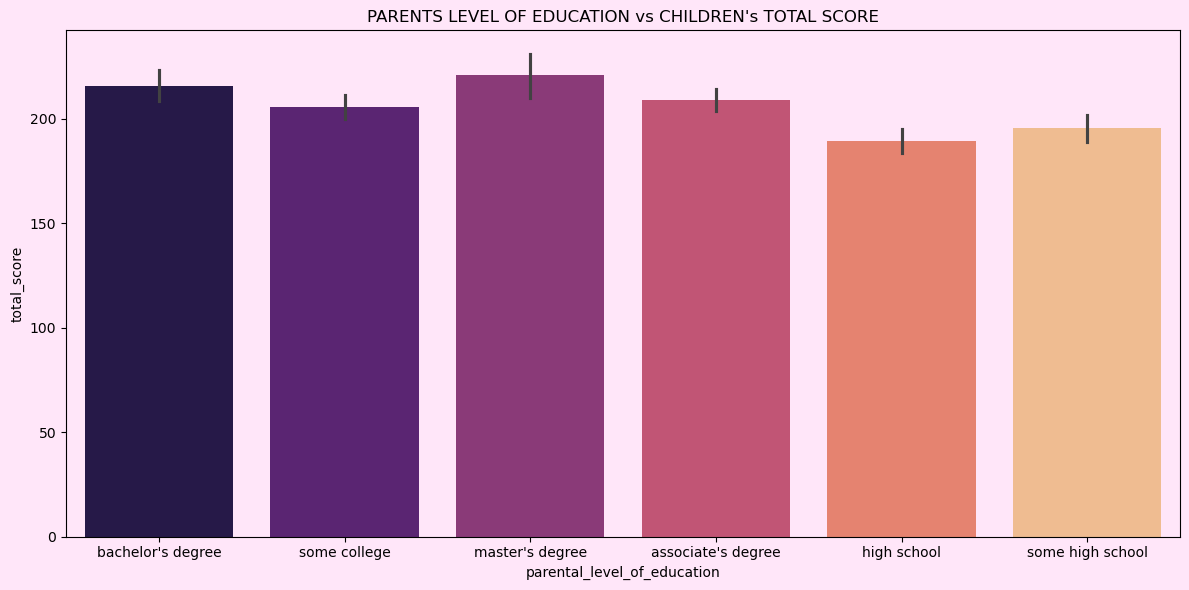

In [416]:
plt.rcParams['figure.facecolor'] = "#ffe6f9"
plt.rcParams['axes.facecolor'] = "#ffe6f9"
plt.figure(figsize=(12,6))
plt.title("PARENTS LEVEL OF EDUCATION vs CHILDREN's TOTAL SCORE")
sns.barplot(x=students['parental_level_of_education'], y= students['total_score'],data=students,palette='magma')
plt.tight_layout()

# **Model Training**

In [498]:
x=students[['math_score','reading_score','writing_score']]
x

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [529]:
y_math=x['math_score']
y_reading=x['reading_score']
y_writing=x['writing_score']

In [537]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [541]:
x_math=x[['reading_score','writing_score']]
x_reading=x[['math_score','writing_score']]
x_writing=x[['math_score','reading_score']]

In [557]:
x_math_train,x_math_test,y_math_train,y_math_test=train_test_split(x_math,y_math,train_size=0.7)
x_reading_train,x_reading_test,y_reading_train,y_reading_test=train_test_split(x_reading,y_reading,train_size=0.7)
x_writing_train,x_writing_test,y_writing_train,y_writing_test=train_test_split(x_writing,y_writing,train_size=0.7)

# **Model Selection**

* Student performance prediction typically falls under supervised learning in machine learning (ML).
* Supervised learning is when you train a model on labeled data, meaning you have both input features and known outcomes (or labels).
* For student performance prediction, the input features might include factors
  such as study hours, attendance, previous grades, socioeconomic background, etc., 
* and the output (label) would be the student's performance, such as a grade or score.
* There are different types of supervised learning models you could use for predicting student performance,such as : Regression models (e.g., linear regression): If the prediction is continuous, such as a grade or test score. 
* Classification models (e.g., decision trees, random forests, support vector machines): 
* If the prediction is categorical, such as passing or failing. 
* In both cases, the model learns from historical data (training data) to predict outcomes for new, unseen student data.


In [559]:
math_model=LinearRegression()
reading_model=LinearRegression()
writing_model=LinearRegression()

In [578]:
math_model.fit(x_math_train, y_math_train)
reading_model.fit(x_reading_train, y_reading_train)
writing_model.fit(x_writing_train, y_writing_train)

math_R2=math_model.score(x_math_test, y_math_test)
reading_R2=reading_model.score(x_reading_test, y_reading_test)
writing_R2=writing_model.score(x_writing_test, y_writing_test)

In [588]:
print(f'Math R^2 :    {math_R2}')
print(f'Reading R^2 : {reading_R2}')
print(f'Writing R^2 : {writing_R2}')

Math R^2 :    0.6788938640714546
Reading R^2 : 0.915378935318253
Writing R^2 : 0.9132058628844141


# *Conclusion*
* Student's performance is correlated with factors such as lunch, race, and parental level of education.
* Females have a higher pass percentage and also achieve top scores.
* Student's performance doesn't show a strong correlation with completing a test preparation course.

* Mean Scores: Math Mean Score: 66.089 Reading Mean Score: 69.169 Writing Mean Score: 68.054.
* Median Scores: Math Median Score: 66.0 Reading Median Score: 70.0 Writing Median Score: 69.0 Mode Scores:
* Math Mode Score: 65.0 Reading Mode Score: 72.0 Writing Mode Score: 74.0
* Standard Deviation Scores: Math Std Score: 15.16 Reading Std Score: 14.60 Writing Std Score: 15.19.
* These statistics provide an overview of the distribution and central tendency of the scores in each subject. The mean represents the average score, the median represents the middle value when the scores are arranged in ascending order, and the mode represents the most frequently occurring score. The standard deviation indicates the amount of variation or spread in the scores.

* For females, the average math score is approximately 63.63, the average reading score is around 72.60, and the average writing score is approximately 72.46.

* On the other hand, for males, the average math score is about 68.72, the average reading score is around 65.47, and the average writing score is approximately 63.31.

* These scores provide insights into the performance of students in different subjects based on their gender. It is important to note that these values are averages, indicating the general trend rather than individual performances.

* From the data, we can observe that, on average, males tend to score higher in math compared to females. Conversely, females tend to have higher average scores in both reading and writing compared to males. However, it's essential to remember that these are just average values and individual variations can exist within each gender.

* Gender has balanced data with female students are 518 (52%) and male students are 482 (48%).

* Further analysis and exploration can be done to determine any potential factors contributing to these score differences, such as teaching methodologies, societal expectations, or individual aptitudes and interests. It is important to approach such analyses with caution and avoid making broad generalizations or assumptions based on these scores.

* This summary highlights how parental education, test preparation, and lunch type impact academic performance across various clusters. Higher parental education and completion of a test preparation course are consistently associated with better outcomes. These insights can guide targeted educational strategies to enhance student performance effectively.